# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 7. Библиотека matplotlib

1. Знакомство с matplotlib
3. Различные типы графиков
2. Настройка отображения графиков в jupyter notebook
3. Оформление графиков
4. Вывод нескольких графиков на одной иллюстрации
5. Инфографика (круговые, столбчатые диаграммы и т.д.)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Графики строятся функцией ```plot()```. Ей достаточно передать единственный параметр с вектором данных для отображения:

[ 0  1  4  9 16 25 36 49 64 81]


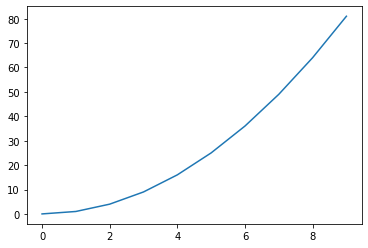

In [3]:
data = np.arange(10) ** 2
print(data)
plt.plot(data)

Также ей можно передать матрицу:

array([[  1,   2,   3,   4],
       [  1,   4,   9,  16],
       [ 10,  40,  90, 160]])

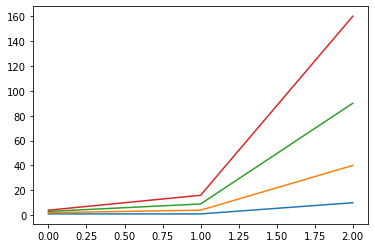

In [6]:
a = np.array([[1, 2, 3, 4], [1, 4, 9, 16], [10, 40, 90, 160]])
plt.plot(a)
a

Для построения полноценного графика функции $y = f(x)$ необходимо вызывать plot с двумя параметрами plot(x, f(x)). 

При этом удобно задавать диапазон переменной c помощью метода numpy.linspace.

In [7]:
x = np.linspace(-5, 5, 50)
print(x)

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]


Выведем график линейной зависимости:

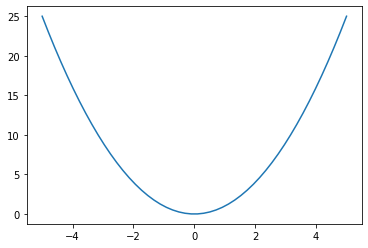

In [9]:
plt.plot(x, x**2)
plt.show()

На одном поле можно строить несколько графиков:


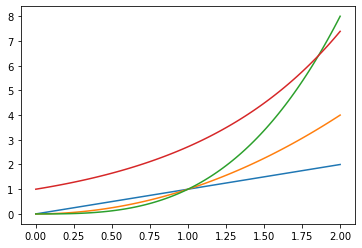

In [12]:
x = np.linspace(0, 2, 100)
plt.plot(x, x) # линейная зависимость
plt.plot(x, x ** 2) # квардратичная зависимость
plt.plot(x, x ** 3) # кубическая
plt.plot(x, np.exp(x)) # экспоненциальная
plt.show()

Простейшую гистограмму можно построить из массива numpy функцией ```hist()```.

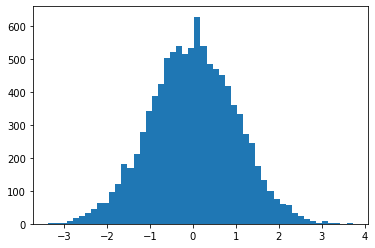

In [16]:
a_rand = np.random.randn(10000)
plt.hist(a_rand, bins=50)
plt.show()

Диаграмму рассеяния можно нарисовать  функцией ```scatter()```:

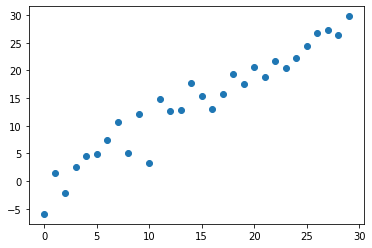

In [17]:
plt.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Для рисования стрелок используем функцию ```arrow()```.

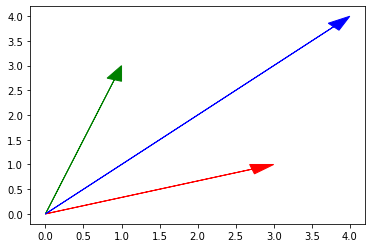

In [21]:
plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True)
plt.arrow(0,0, 1,3, head_width=0.2, color='g', length_includes_head=True)
plt.arrow(0,0, 4,4, head_width=0.2, color='b', length_includes_head=True)
plt.show()

Другие полезные типы графиков:

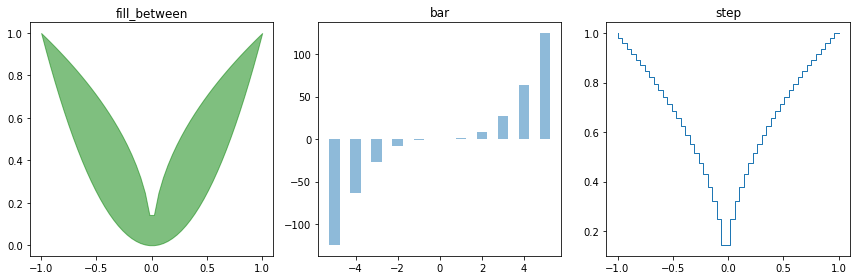

In [22]:
x = np.linspace(-1, 1)

fig, axes = plt.subplots(1, 3, figsize = (12, 4))

# закрасить пространство между графиками
axes[0].fill_between(x, np.sqrt(np.abs(x)), x**2, 
                     color="green", alpha=0.5);
axes[0].set_title("fill_between");

# столбчатая диаграмма
axes[1].bar(np.arange(-5, 6), np.arange(-5, 6)**3, 
            align="center", width=0.5, alpha=0.5)
axes[1].set_title("bar")

# ступенчатый график
axes[2].step(x, np.sqrt(np.abs(x)), lw=1)
axes[2].set_title("step")

fig.tight_layout()

#### Упражнение

- Нарисуйте вектор [1, 2]:

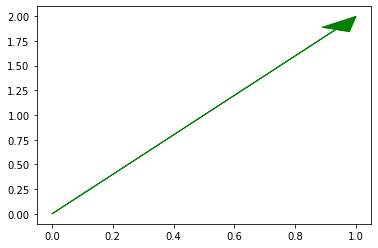

In [24]:
# ваш код здесь
vec = np.array([1,2])
plt.arrow(0,0, *vec, head_width=0.1, color='g', length_includes_head=True) 
plt.show()

- Нарисуйте график синусоиды в диапазоне от $-2\pi$ до $2\pi$

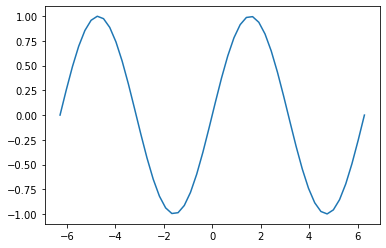

In [25]:
# ваш код здесь
x = np.linspace(-np.pi * 2, np.pi * 2, 50) 
y = np.sin(x) 
plt.plot(x, y) 
plt.show()

- Дано: матрица размера Nx2, она содержит случайные числа. Нарисуйте ее строки в виде векторов, исходящих из начала координат

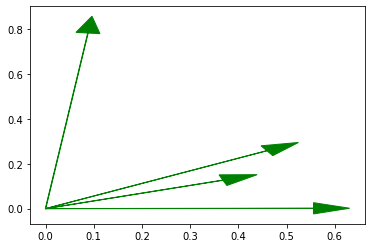

In [32]:
N = 4
M = np.random.random((N,2))
# ваш код здесь
for i in range(M.shape[0]): 
    plt.arrow(0,0, *M[i], head_width=0.05, color='g', length_includes_head=True) 
plt.show()


__???__ Все ли вас устраивает в этих графиках?



-

###  Настройка пространства numpy и отображения графиков

Размеры выводимых графиков могут быть настроены как глобально, так и для каждой иллюстрации отдельно.

Снова построим линейный график и расстоимся из-за его непропорциональности (и других визуальных недостатков):

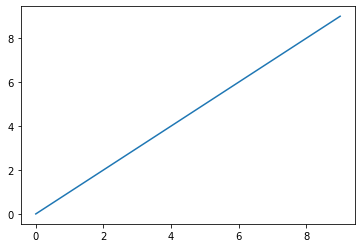

In [33]:
plt.plot(np.arange(10))

Перед построением графика проинициализируйте иллюстрацию, вызвав функцию ```figure()``` с параметром ```figsize```, в котором можно передать размеры картинки в дюймах. Соотношение и будет пропорцией отображаемого графика.

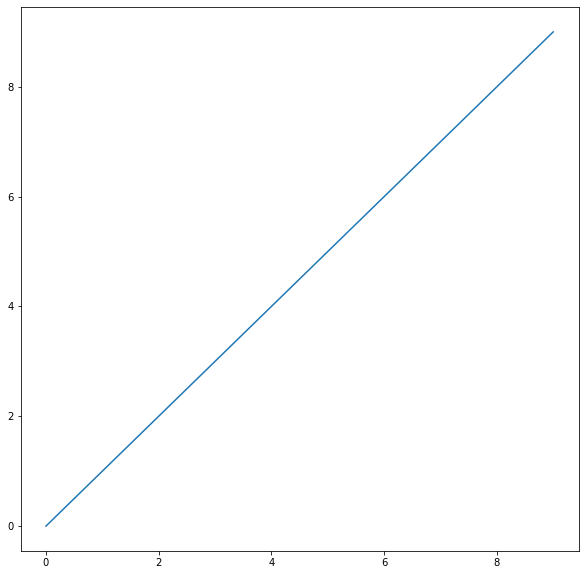

In [34]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(10))
plt.show()

Также можно задать нелинейные пропорции осей: логарифмическую, симметричную логарифмическую, логистическую и т.д.

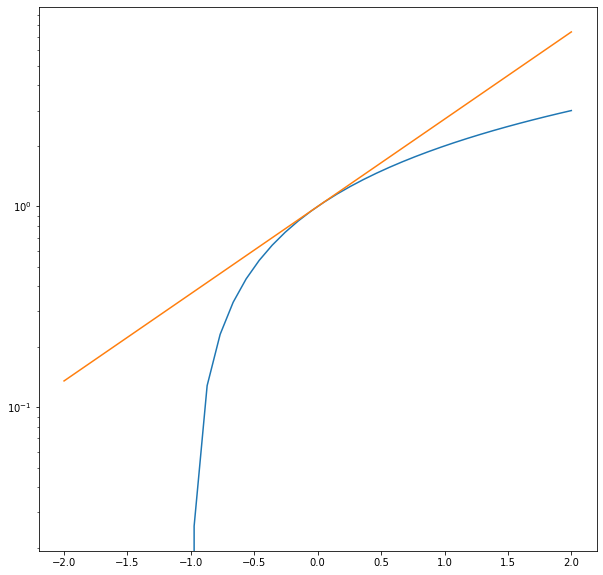

In [40]:
x = np.linspace(-2,2,40)
plt.figure(figsize=(10,10))
plt.plot(x, x+1)
plt.plot(x, np.exp(x))
plt.yscale('log')
plt.show()

Давайте оформим график:
 - зададим диапазон отображения аргументов и функции
 - отобразим координатную сетку и оси
 - зададим метки для осей и самой иллюстрации
 - выведем легенду.
    

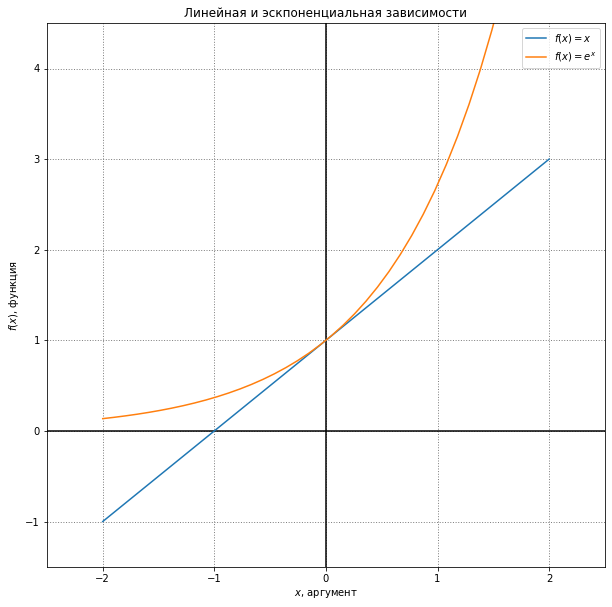

In [45]:
plt.figure(figsize=(10,10))

# зададим диапазон по осям, с полями
margin = .5
plt.ylim((-1.5, 4.5))
plt.xlim((x.min()-margin, x.max()+margin))

# отобразим координатную сетку и оси
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0

# зададим метки для осей и самой иллюстрации
plt.xlabel("$x$, аргумент") 
plt.ylabel("$f(x)$, функция") # Label for y-axis.
plt.title('Линейная и эскпоненциальная зависимости')

# построим график
plt.plot(x, x+1, label="$f(x) = x$")
plt.plot(x, np.exp(x), label="$f(x) = e^x$")

# разместим легенду
plt.legend(loc='best')

plt.show()

Получилась довольно громоздкая конструкция. Если в вашей работе надо будет представлять все графики в одинаковом оформлении, ее можно убрать в отдельную функцию (а ее, в свою очередь, в модуль). Для этого нам надо ознакомиться с основными объектами matplotlib.

### Основные объекты matplotlib

 - Объект ```figure``` - сама иллюстрация.
 - Объект ```axes``` - один из графиков на этой иллюстрации, именно к этому объекту мы будем применять все те методы, с которыми мы ознакомились выше:
    - ```.plot()```
    - ```.ylim()``` и ```.xlim()```
    - ```.title()```, ```.xlabel()```, ```.ylabel()```
    - и т.д.

Получить экземпляр объекта ```figure``` и требуемое количество ```axes``` можно из функции ```subplots()```, ей надо передать количество графиков по горизонтали и по вертикали. Она возвращает кортеж из иллюстрации и подграфиков - если их несколько, она вернет их список вторым членом кортежа.

Построим наши графики в соответствии с объектно-ориентированным подходом:

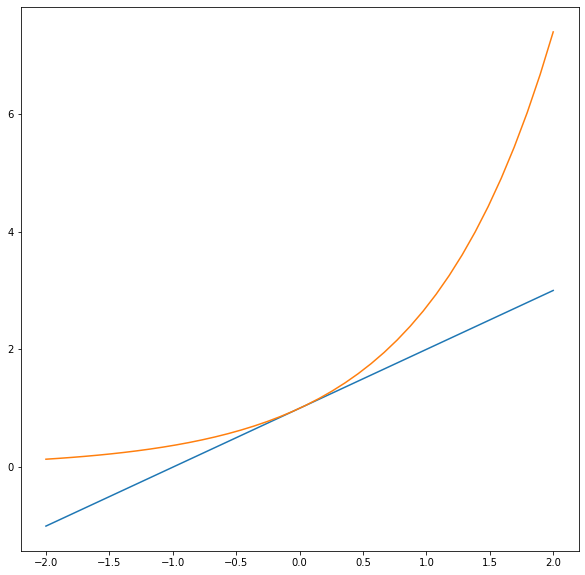

In [46]:
fig, ax = plt.subplots(1,1) # пока что нам нужен один график

fig.set_size_inches(10,10)

ax.plot(x, x+1, label="$f(x) = x$")
ax.plot(x, np.exp(x), label="$f(x) = e^x$")

plt.show()

Перенесем все оформление в функцию:

In [47]:
def my_plotter(ax, data1, data2, **param_dict):
    
    # отобразим координатную сетку и оси
    
    ax.axhline(0,color='black') # x = 0
    ax.axvline(0,color='black') # y = 0

    # зададим метки для осей и самой иллюстрации
    ax.set_xlabel("$x$, аргумент") 
    ax.set_ylabel("$f(x)$, функция") # Label for y-axis.
    
    out = ax.plot(data1, data2, **param_dict)
    return out

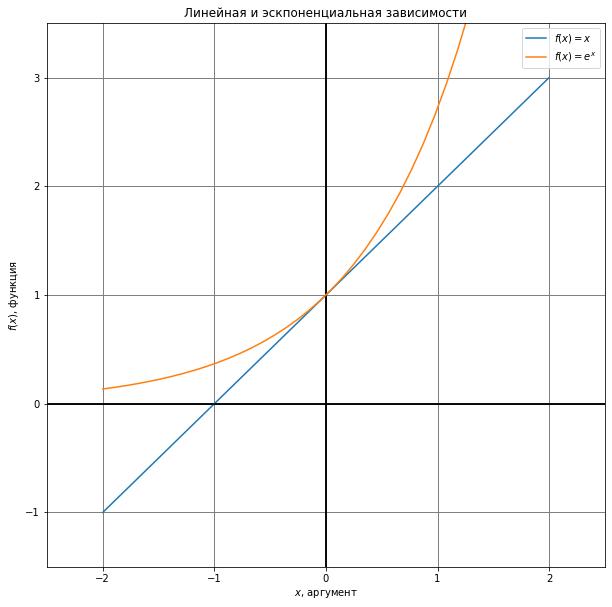

In [49]:
fig, ax = plt.subplots(1,1) # пока что нам нужен один график

fig.set_size_inches(10,10)

ax.set_title('Линейная и эскпоненциальная зависимости')

xx = x+1 # множество значений для линейной функции

# зададим диапазон по осям, с полями
margin = .5
ax.set_ylim((xx.min()-margin, xx.max()+margin))
ax.set_xlim((x.min()-margin, x.max()+margin))
ax.grid(color='grey', linestyle='-', linewidth=1)



# построим график
my_plotter(ax, x, xx, label="$f(x) = x$")
my_plotter(ax, x, np.exp(x), label="$f(x) = e^x$")

# разместим легенду
ax.legend(loc='best')

plt.show()



#### __ЗАДАНИЕ__ 

1. Используя ```my_plotter()``` выведите на ту же плоскость график функции $y = x^2 +1$ 
2. Задайте логарифмическую шкалу отображения методом ```.set_yscale()```

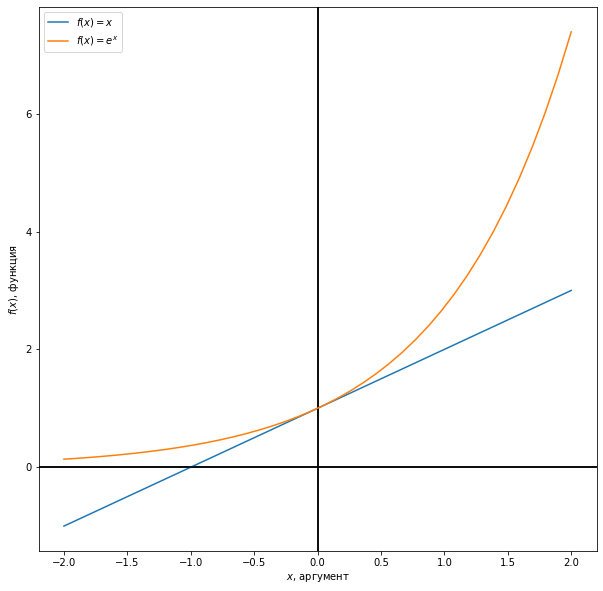

In [50]:
# ваш код здесь
fig, ax = plt.subplots(1,1) # пока что нам нужен один график
fig.set_size_inches(10,10)
my_plotter(ax, x, xx, label="$f(x) = x$")
my_plotter(ax, x, np.exp(x), label="$f(x) = e^x$")

# разместим легенду
ax.legend(loc='best')

plt.show()



In [58]:
def prepare_figure(title, xlim, ylim=None):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    
    ax.set_title(title)

    # зададим диапазон по осям, с полями
    ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)
    ax.grid(color='grey', linestyle='-', linewidth=1)
    
    ax.axhline(0,color='black') # x = 0
    ax.axvline(0,color='black') # y = 0

    # зададим метки для осей и самой иллюстрации
    ax.set_xlabel("$x$, аргумент") 
    ax.set_ylabel("$f(x)$, функция")
    
    return fig, ax

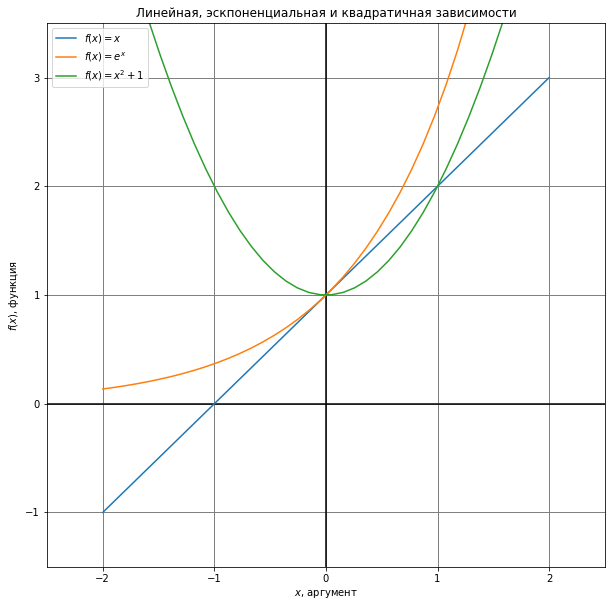

In [60]:
fix, ax = prepare_figure('Линейная, эскпоненциальная и квадратичная зависимости', \
                         (x.min()-margin, x.max()+margin), \
                         (xx.min()-margin, xx.max()+margin ) \
                        )

ax.plot(x, xx, label="$f(x) = x$")
ax.plot(x, np.exp(x), label="$f(x) = e^x$")
ax.plot(x, x**2 + 1, label="$f(x) = x^2+1$")

ax.legend(loc='best')

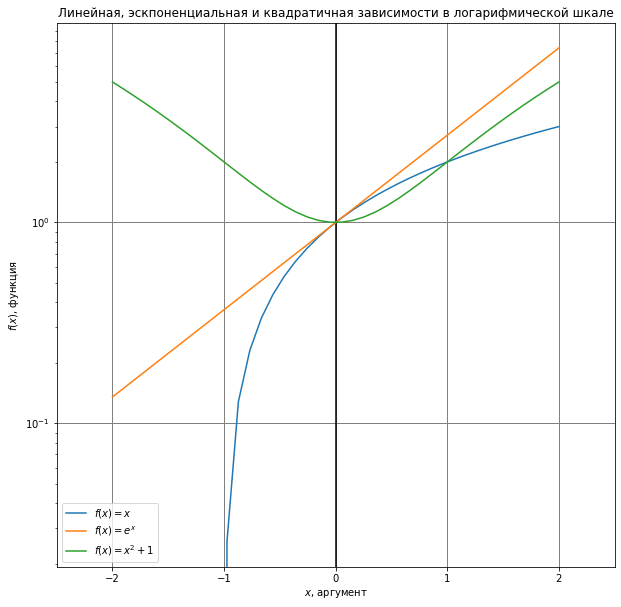

In [61]:
fix, ax = prepare_figure('Линейная, эскпоненциальная и квадратичная зависимости в логарифмической шкале', \
                         (x.min()-margin, x.max()+margin), \
                        )

ax.plot(x, xx, label="$f(x) = x$")
ax.plot(x, np.exp(x), label="$f(x) = e^x$")
ax.plot(x, x**2 + 1, label="$f(x) = x^2+1$")

ax.set_yscale('log')

ax.legend(loc='best')

### Вывод на одну иллюстрацию несколько графиков сразу

Для этого в matplotlib используется "сеточный" подход: мы мысленно разбиваем нашу иллюстрацию на ячейки и сами определяем, какую часть ячейки будет занимать наш график.

Затем мы обращаемся к функции ```subplot2grid()```, которая принимает следущие аргументы:
 - ```shape``` - кортеж с формой воображаемой "сетки" по горизонтали и вертикали
 - ```position``` - кортеж с координатами в ячейках сетки
 - ```colspan``` - сколько ячеек сетки данный график будет объединять по горизонтали
 - ```rowspan``` - сколько ячеек сетки данный график будет объединять по верткали
 


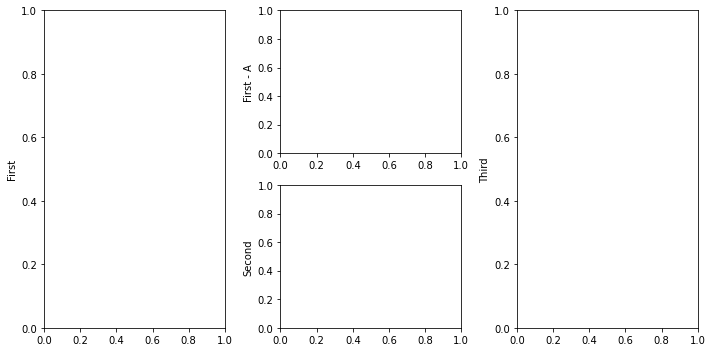

In [72]:
fig = plt.figure()
fig.set_size_inches(10,5)
# Arguments: shape, position and spanning in each (row or col) direction
# Аргументы: форма в виде кортежа с количеством ячеек по вертикали и горизонтали
ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2) 
ax1.set_ylabel('First')
ax2_ = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax2_.set_ylabel('First - A')
ax2 = plt.subplot2grid((2, 3), (1, 1), colspan=1)
ax2.set_ylabel('Second')
ax3 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
ax3.set_ylabel('Third')
# Automatically adjusts the positions of the axes to prevent overlapping
fig.tight_layout()

Также можно использовать уже знакомую нам конструкцию ```subplots()```:

Figure(432x288)


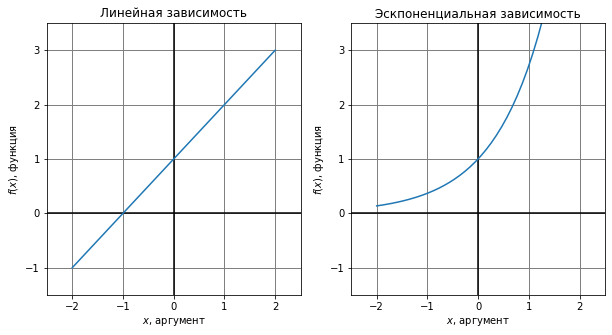

In [75]:
fig, axs = plt.subplots(1,2) 

fig.set_size_inches(10,5) # обратите внимание на размер по высоте, мы уменьшили его вдвое!

axs[0].set_title('Линейная зависимость')
axs[1].set_title('Эскпоненциальная зависимость')

x = np.linspace(-2,2,40)

xx = x+1 # множество значений для линейной функции

# зададим диапазон по осям, с полями
margin = .5
for ax in axs:
    ax.set_ylim((xx.min()-margin, xx.max()+margin))
    ax.set_xlim((x.min()-margin, x.max()+margin))



# построим график
my_plotter(axs[0], x, xx, label="$f(x) = x$")
my_plotter(axs[1], x, np.exp(x), label="$f(x) = e^x$")


plt.show()

__ЗАДАНИЕ__ Выведите 3 графика горизонтально, затем два + один график внизу, третий график - кубическая зависимость.

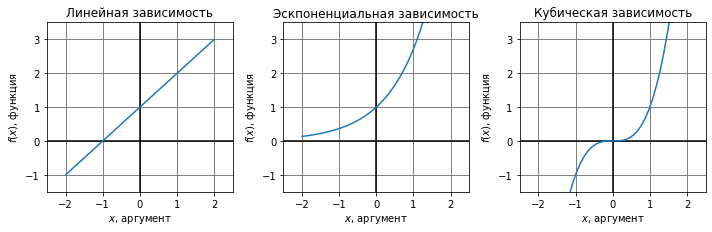

In [80]:
# ваш код здесь
fig, axs = plt.subplots(1,3) 

fig.set_size_inches(10,3.333333) # обратите внимание на размер по высоте, мы уменьшили его вдвое!

axs[0].set_title('Линейная зависимость')
axs[1].set_title('Эскпоненциальная зависимость')
axs[2].set_title('Кубическая зависимость')

# зададим диапазон по осям, с полями
margin = .5
for ax in axs:
    ax.set_ylim((xx.min()-margin, xx.max()+margin))
    ax.set_xlim((x.min()-margin, x.max()+margin))

# построим график
my_plotter(axs[0], x, xx, label="$f(x) = x$")
my_plotter(axs[1], x, np.exp(x), label="$f(x) = e^x$")
my_plotter(axs[2], x, x**3, label="$f(x) = x^3$")

fig.tight_layout()

plt.show()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


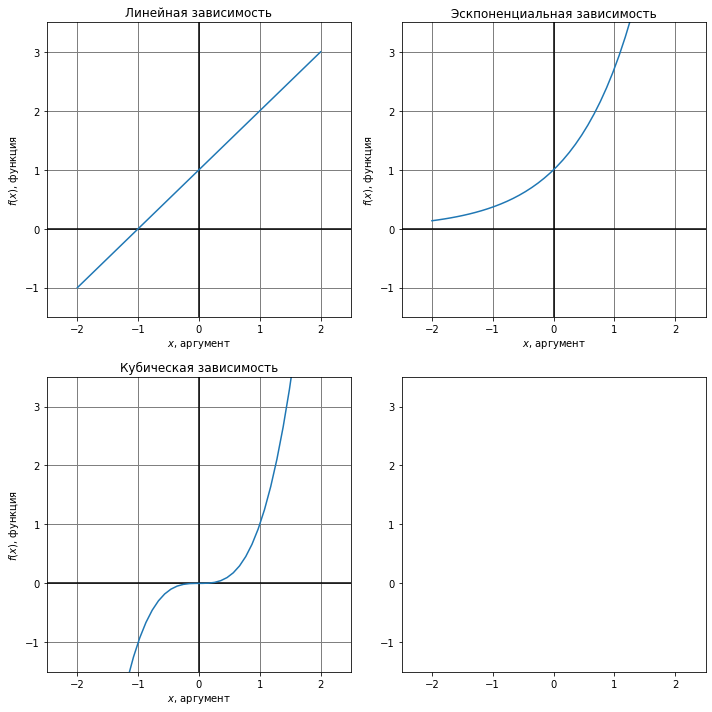

In [92]:
# ваш код здесь
fig, axs = plt.subplots(2,2) 

print(axs)

fig.set_size_inches(10,10) # обратите внимание на размер по высоте, мы уменьшили его вдвое!

axs[0, 0].set_title('Линейная зависимость')
axs[0, 1].set_title('Эскпоненциальная зависимость')
axs[1, 0].set_title('Кубическая зависимость')

# зададим диапазон по осям, с полями
margin = .5


for axs_ in axs:
    for ax in axs_:
        ax.set_ylim((xx.min()-margin, xx.max()+margin))
        ax.set_xlim((x.min()-margin, x.max()+margin))

# построим график
my_plotter(axs[0, 0], x, xx, label="$f(x) = x$")
my_plotter(axs[0, 1], x, np.exp(x), label="$f(x) = e^x$")
my_plotter(axs[1, 0], x, x**3, label="$f(x) = x^3$")

fig.tight_layout()

plt.show()

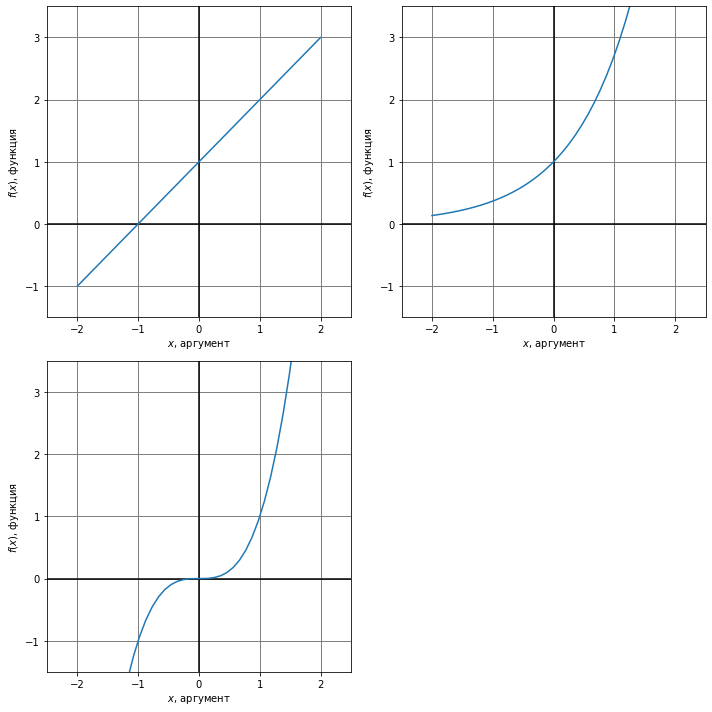

In [94]:
fig = plt.figure()
fig.set_size_inches(10,10)
# Arguments: shape, position and spanning in each (row or col) direction
# Аргументы: форма в виде кортежа с количеством ячеек по вертикали и горизонтали
axs = list(range(3))
axs[0] = plt.subplot2grid((2, 2), (0, 0))
axs[1] = plt.subplot2grid((2, 2), (0, 1))
axs[2] = plt.subplot2grid((2, 2), (1, 0))

margin = .5
for ax in axs:
    ax.set_ylim((xx.min()-margin, xx.max()+margin))
    ax.set_xlim((x.min()-margin, x.max()+margin))

# построим график
my_plotter(axs[0], x, xx, label="$f(x) = x$")
my_plotter(axs[1], x, np.exp(x), label="$f(x) = e^x$")
my_plotter(axs[2], x, x**3, label="$f(x) = x^3$")

fig.tight_layout()

plt.show()

### Инфографика

Круговая диаграмма (pie chart) строится функцией ```pie()```. Направление обхода по умолчанию - против часовой стрелки.
Параметр ```explode``` позволяет задать смещение для некоторых элементов диаграммы. При этом в ```sizes``` могут быть совершенно любые числа, не обязательно процентное соотношение.

In [97]:
# сделаем графики побольше
plt.rcParams['figure.figsize'] = (7.0, 7.0)

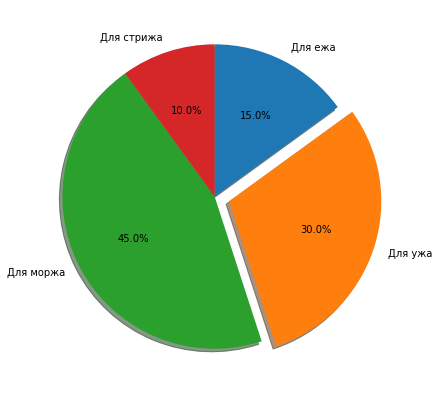

In [99]:
labels = 'Для ежа', 'Для ужа', 'Для моржа', 'Для стрижа'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', counterclock=False,
        shadow=True, startangle=90)

plt.show()

Столбчатые диаграммы с распределением по группам строятся той же функцией ```bar()```, но для построения "надстройки" ей надо передать параметр ```bottom```, который будет содержать данные для "основной" диаграммы:

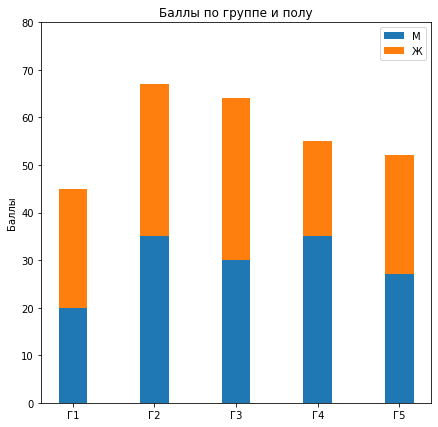

In [100]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.ylabel('Баллы')
plt.title('Баллы по группе и полу')
plt.xticks(ind, ('Г1', 'Г2', 'Г3', 'Г4', 'Г5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('М', 'Ж'))

plt.show()

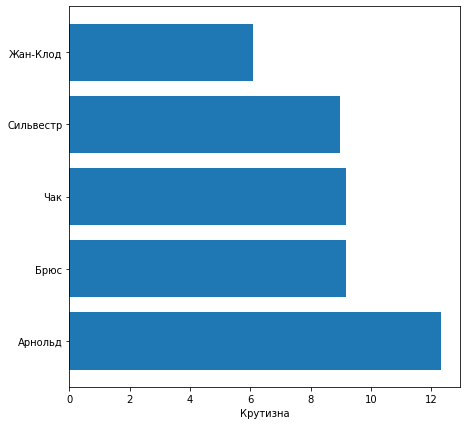

In [102]:
fig, ax = plt.subplots()

people = ('Жан-Клод', 'Сильвестр', 'Чак', 'Брюс', 'Арнольд')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel('Крутизна')


plt.show()

##### ЗАДАНИЕ

Для датасета "Титаник" постройте круговые диаграммы для следующих признаков:
 - класс каюты
 - порт посадки на судно

In [105]:
df_titanic = pd.read_csv('data/titanic.csv',
                  index_col='PassengerId')
embarked_ports = {'S': 'Southampton', 'C':'Cherbourg', 'Q': 'Queenstown'}
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

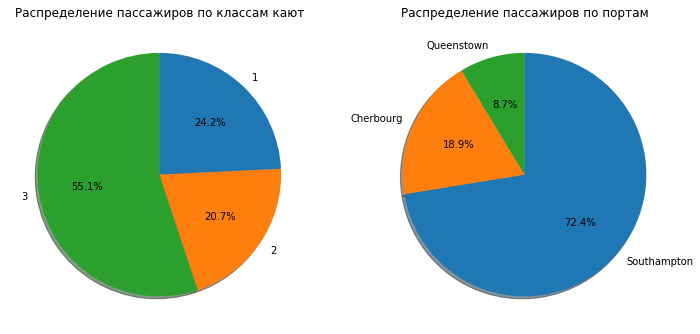

In [121]:
# ваш код здесь
fig, axs = plt.subplots(1,2)

fig.set_size_inches(12,6)

s_pclass = df_titanic['Pclass'].value_counts().sort_index()
s_emb = df_titanic['Embarked'].value_counts()

axs[0].pie(s_pclass, labels=s_pclass.index, autopct='%1.1f%%', counterclock=False,
        shadow=True, startangle=90)
axs[0].set_title("Распределение пассажиров по классам кают")

axs[1].pie(s_emb, labels=[embarked_ports[abbr] for abbr in s_emb.index], autopct='%1.1f%%', counterclock=False,
        shadow=True, startangle=90)
axs[1].set_title("Распределение пассажиров по портам")



plt.show()

Постройте столбчатую диаграмму с распределением по полу в каютах разных классов.

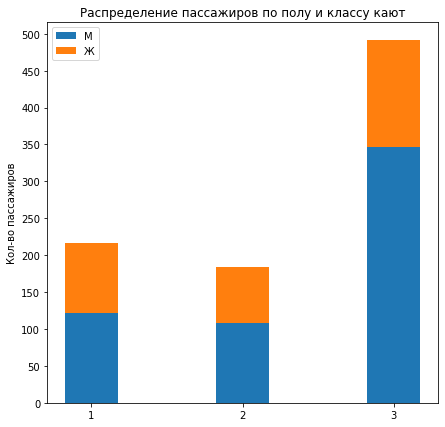

In [129]:
# ваш код здесь
s_male = df_titanic[ df_titanic.Sex == 'male' ]['Pclass'].value_counts().sort_index()
s_female = df_titanic[ df_titanic.Sex == 'female' ]['Pclass'].value_counts().sort_index()

ind = s_male.index    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, s_male, width)
p2 = plt.bar(ind, s_female, width,
             bottom=s_male)

plt.ylabel('Кол-во пассажиров')
plt.title('Распределение пассажиров по полу и классу кают')
plt.xticks(ind)
plt.yticks(np.arange(0, s_male.max()+s_female.max()+50, 50))
plt.legend((p1[0], p2[0]), ('М', 'Ж'))

plt.show()